In [1]:
!pip3 install torchei

Could not fetch URL https://pypi.org/simple/torchei/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/torchei/ (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1129)'))) - skipping

ERROR: Could not find a version that satisfies the requirement torchei (from versions: none)
ERROR: No matching distribution found for torchei


In [2]:
import torch
from torchvision import models
import torchei
from matplotlib import pyplot as plt

torch.Size([1, 8, 3, 224, 224])


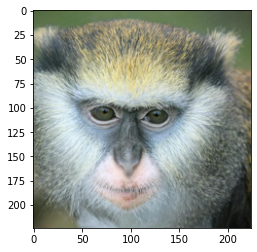

this is a guenon


In [3]:
model = models.resnet18(pretrained=True)
data = torch.load('./datasets/ilsvrc_valid8.pt')
print(data.shape)
plt.imshow(data[0][0].permute(1,2,0))
plt.show()
with open("./datasets/imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
print(f'this is a {categories[torchei.get_result(model,data)[0].int().item()]}')

In [4]:
fault_model = torchei.fault_model(model,data)

In [5]:
fault_model.emat_attack(10,1e-3)

100%|██████████| 10/10 [00:02<00:00,  4.36it/s]


tensor(1.)

In [6]:
fault_model.sern_calc(output_class=1000)

[tensor(0.0293),
 tensor(0.0146),
 tensor(0.0145),
 tensor(0.0144),
 tensor(0.0143),
 tensor(0.0149),
 tensor(0.0141),
 tensor(0.0154),
 tensor(0.0139),
 tensor(0.0137),
 tensor(0.0145),
 tensor(0.0133),
 tensor(0.0153),
 tensor(0.0128),
 tensor(0.0122),
 tensor(0.0135),
 tensor(0.0106),
 tensor(0.0148),
 tensor(0.0078),
 tensor(6.9201e-08),
 tensor(7.8203e-06)]

In [10]:
fault_model.outlierDR_protection()
fault_model.emat_attack(10,1e-3)

100%|██████████| 10/10 [00:11<00:00,  1.18s/it]


tensor(0.3875)